# We Can Code Data Workshop 2019

1. Download the data
1. Sorting
1. Filters
1. Aggregations
1. Search form 

# 1. Download the data

###1.1. Import the libraries we are going to use

In [0]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, widgets
import plotly.express as pexpress


In [0]:
#@title Example form fields
#@markdown Forms support many types of fields.

no_type_checking = ''  #@param
string_type = 'example'  #@param {type: "string"}
slider_value = 142  #@param {type: "slider", min: 100, max: 200}
number = 102  #@param {type: "number"}
date = '2010-11-05'  #@param {type: "date"}
pick_me = "monday"  #@param ['monday', 'tuesday', 'wednesday', 'thursday']
select_or_input = "apples" #@param ["apples", "bananas", "oranges"] {allow-input: true}
#@markdown ---


In [0]:
#@title Example form fields
#@markdown Forms support many types of fields.

no_type_checking = ''  #@param
string_type = 'example'  #@param {type: "string"}
slider_value = 142  #@param {type: "slider", min: 100, max: 200}
number = 102  #@param {type: "number"}
date = '2010-11-05'  #@param {type: "date"}
pick_me = "monday"  #@param ['monday', 'tuesday', 'wednesday', 'thursday']
select_or_input = "apples" #@param ["apples", "bananas", "oranges"] {allow-input: true}
#@markdown ---


In [0]:
#@title Example form fields
#@markdown Forms support many types of fields.

no_type_checking = ''  #@param
string_type = 'example'  #@param {type: "string"}
slider_value = 142  #@param {type: "slider", min: 100, max: 200}
number = 102  #@param {type: "number"}
date = '2010-11-05'  #@param {type: "date"}
pick_me = "monday"  #@param ['monday', 'tuesday', 'wednesday', 'thursday']
select_or_input = "apples" #@param ["apples", "bananas", "oranges"] {allow-input: true}
#@markdown ---


### 1.2. Define the URL that we will take date from

In [0]:
DATA_URL = "https://raw.githubusercontent.com/akimirka/wcc-data-2019/master/flight_search_results_final.csv"

### 1.3. Download and parse this data from CSV file to Pandas dataframe

In [6]:
df_original = pd.read_csv(DATA_URL, parse_dates=['depart_time', 'return_time'])
df_original.head()

,from_airport,to_airport,to_city,to_country,depart_time,return_time,total_stops,airlines,price
0,ORD,MNL,Manila,Republic of the Philippines,2020-05-25 20:30:00,2020-06-16 07:55:00,2,BR-BR,986
1,KUL,CAN,Guangzhou,China,2020-02-04 13:10:00,2020-02-06 03:38:00,0,CZ-CZ,321
2,LAX,LAS,Las Vegas,USA,2019-12-13 02:12:00,2019-12-14 12:50:00,0,DL-DL,107
3,LAX,LAS,Las Vegas,USA,2019-12-13 02:30:00,NaT,0,NaN,67
4,SFO,SIN,Singapore,Singapore,2020-01-22 19:20:00,2020-01-31 18:42:00,2,BR-BR,915


### 1.4. Make a copy of original data and save it to df

In [0]:
df = df_original.copy()

### 1.5. Get to know the data

In [0]:
df.head(6)

,from_airport,to_airport,to_city,to_country,depart_time,return_time,total_stops,airlines,price
0,ORD,MNL,Manila,Republic of the Philippines,2020-05-25 20:30:00,2020-06-16 07:55:00,2,BR-BR,986
1,KUL,CAN,Guangzhou,China,2020-02-04 13:10:00,2020-02-06 03:38:00,0,CZ-CZ,321
2,LAX,LAS,Las Vegas,USA,2019-12-13 02:12:00,2019-12-14 12:50:00,0,DL-DL,107
3,LAX,LAS,Las Vegas,USA,2019-12-13 02:30:00,NaT,0,NaN,67
4,SFO,SIN,Singapore,Singapore,2020-01-22 19:20:00,2020-01-31 18:42:00,2,BR-BR,915
5,BRU,FNC,Madeira,Portuguese Republic,2020-04-06 16:30:00,2020-04-15 12:10:00,2,"TP-FR,U2",270


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10642 entries, 0 to 10641
Data columns (total 9 columns):
from_airport    10642 non-null object
to_airport      10642 non-null object
to_city         10642 non-null object
to_country      10642 non-null object
depart_time     10642 non-null datetime64[ns]
return_time     8206 non-null datetime64[ns]
total_stops     10642 non-null int64
airlines        8206 non-null object
price           10642 non-null int64
dtypes: datetime64[ns](2), int64(2), object(5)
memory usage: 748.4+ KB


In [0]:
df.shape

(10642, 9)

In [0]:
df.tail()

,from_airport,to_airport,to_city,to_country,depart_time,return_time,total_stops,airlines,price
10637,SIN,TSA,Taipei,Taiwan,2019-12-13 11:15:00,NaT,1,NaN,579
10638,JNB,LCY,London,UK,2020-01-25 15:20:00,2020-02-10 16:48:00,3,LX-LH,785
10639,BKK,JFK,New York,USA,2019-12-18 07:25:00,2019-12-28 08:01:00,2,CZ-CZ,901
10640,CNX,BKK,Bangkok,Kingdom of Thailand,2019-12-12 16:30:00,2019-12-14 14:17:00,0,WE-WE,144
10641,HND,BKK,Bangkok,Kingdom of Thailand,2020-01-08 01:30:00,NaT,1,NaN,169



### 1.6. Select relevant columns only

In [0]:
IMPORTANT_COLUMNS = ['from_airport', 'to_airport', 'depart_time', 'return_time','price']
df[IMPORTANT_COLUMNS].head(5)


,from_airport,to_airport,depart_time,return_time,price
0,ORD,MNL,2020-05-25 20:30:00,2020-06-16 07:55:00,986
1,KUL,CAN,2020-02-04 13:10:00,2020-02-06 03:38:00,321
2,LAX,LAS,2019-12-13 02:12:00,2019-12-14 12:50:00,107
3,LAX,LAS,2019-12-13 02:30:00,NaT,67
4,SFO,SIN,2020-01-22 19:20:00,2020-01-31 18:42:00,915


# 2. Sorting the data

### 2.1. Sort values by price

In [0]:
df.sort_values(by="price")[IMPORTANT_COLUMNS]

,from_airport,to_airport,depart_time,return_time,price
6682,SVQ,MAD,2020-02-03 15:40:00,NaT,14
2796,RZE,STN,2019-12-15 16:45:00,NaT,17
4810,STN,BUD,2020-01-07 06:40:00,NaT,18
4312,DUS,PMI,2020-01-26 01:45:00,2020-01-30 05:39:00,20
4484,LUX,STN,2020-01-26 16:40:00,2020-01-27 22:15:00,23
...,...,...,...,...,...
2087,SFO,SAF,2019-12-23 05:15:00,2020-01-03 17:48:00,19729
62,ROC,MNL,2020-08-18 09:30:00,2020-10-16 07:20:00,19742
305,DFW,BOM,2020-03-17 08:15:00,2020-03-18 21:21:00,24560
1227,YXE,GRU,2020-05-19 09:00:00,2020-07-02 18:15:00,25354


### 2.2. Sort values by price from highest to lowest

In [0]:
df.sort_values(by="price", ascending=False)[IMPORTANT_COLUMNS]

,from_airport,to_airport,depart_time,return_time,price
5093,GIG,LAX,2020-07-02 17:35:00,2020-07-16 06:24:00,37830
1227,YXE,GRU,2020-05-19 09:00:00,2020-07-02 18:15:00,25354
305,DFW,BOM,2020-03-17 08:15:00,2020-03-18 21:21:00,24560
62,ROC,MNL,2020-08-18 09:30:00,2020-10-16 07:20:00,19742
2087,SFO,SAF,2019-12-23 05:15:00,2020-01-03 17:48:00,19729
...,...,...,...,...,...
7555,LUX,STN,2020-01-27 16:40:00,2020-01-29 18:49:00,23
4312,DUS,PMI,2020-01-26 01:45:00,2020-01-30 05:39:00,20
4810,STN,BUD,2020-01-07 06:40:00,NaT,18
2796,RZE,STN,2019-12-15 16:45:00,NaT,17


# 3. Filters

### 3.1. Find flights to Japan






In [0]:
df[df.to_country == 'Japan']

,from_airport,to_airport,to_city,to_country,depart_time,return_time,total_stops,airlines,price
60,LAX,UKB,Kobe,Japan,2019-12-18 05:40:00,NaT,1,NaN,1410
115,JFK,HND,Tokyo,Japan,2020-03-20 22:30:00,2020-03-28 10:24:00,2,CA-CA,934
165,MUC,NRT,Tokyo,Japan,2020-01-31 02:15:00,2020-02-14 13:42:00,2,TK-TK,814
185,BUR,ITM,Osaka,Japan,2019-12-18 03:00:00,NaT,2,NaN,3318
189,LAX,TKS,Tokushima,Japan,2019-12-18 05:40:00,NaT,1,NaN,1485
...,...,...,...,...,...,...,...,...,...
10257,MIA,HND,Tokyo,Japan,2020-06-22 12:50:00,2020-06-29 05:14:00,3,OS-LH,1333
10351,VCE,NRT,Tokyo,Japan,2020-07-02 11:50:00,2020-07-16 03:28:00,2,EK-EK,4643
10459,MAD,NRT,Tokyo,Japan,2020-01-07 00:50:00,2020-06-09 21:38:00,2,AZ-AZ,685
10561,ATH,HND,Tokyo,Japan,2019-12-25 03:30:00,2019-12-31 13:42:00,2,"LH-LH,NH",956


### 3.2 Filter by trip type (round-trip or one-way)



#### 3.2.1. Filter one-way flights

In [8]:
df[df.return_time.isna()].head()

,from_airport,to_airport,to_city,to_country,depart_time,return_time,total_stops,airlines,price
3,LAX,LAS,Las Vegas,USA,2019-12-13 02:30:00,NaT,0,NaN,67
8,DXB,MSP,Minneapolis,USA,2019-12-08 09:00:00,NaT,2,NaN,1339
17,JFK,SJU,San Juan,Commonwealth of Puerto Rico,2019-12-31 13:00:00,NaT,1,NaN,150
18,MIA,SFO,San Francisco,USA,2019-12-24 15:39:00,NaT,0,NaN,164
22,BDL,SJU,San Juan,Commonwealth of Puerto Rico,2019-12-24 13:05:00,NaT,1,NaN,448


#### 3.2.2. Filter round-trip (return) flights (~ - not operator)

In [0]:
df[~df.return_time.isna()].head()

,from_airport,to_airport,to_city,to_country,depart_time,return_time,total_stops,airlines,price
0,ORD,MNL,Manila,Republic of the Philippines,2020-05-25 20:30:00,2020-06-16 07:55:00,2,BR-BR,986
1,KUL,CAN,Guangzhou,China,2020-02-04 13:10:00,2020-02-06 03:38:00,0,CZ-CZ,321
2,LAX,LAS,Las Vegas,USA,2019-12-13 02:12:00,2019-12-14 12:50:00,0,DL-DL,107
4,SFO,SIN,Singapore,Singapore,2020-01-22 19:20:00,2020-01-31 18:42:00,2,BR-BR,915
5,BRU,FNC,Madeira,Portuguese Republic,2020-04-06 16:30:00,2020-04-15 12:10:00,2,"TP-FR,U2",270


#### 3.2.3. Add is_round_trip column

In [0]:
df["is_round_trip"] = ~df.return_time.isna()

In [0]:
df

,from_airport,to_airport,to_city,to_country,depart_time,return_time,total_stops,airlines,price,is_round_trip
0,ORD,MNL,Manila,Republic of the Philippines,2020-05-25 20:30:00,2020-06-16 07:55:00,2,BR-BR,986,True
1,KUL,CAN,Guangzhou,China,2020-02-04 13:10:00,2020-02-06 03:38:00,0,CZ-CZ,321,True
2,LAX,LAS,Las Vegas,USA,2019-12-13 02:12:00,2019-12-14 12:50:00,0,DL-DL,107,True
3,LAX,LAS,Las Vegas,USA,2019-12-13 02:30:00,NaT,0,NaN,67,False
4,SFO,SIN,Singapore,Singapore,2020-01-22 19:20:00,2020-01-31 18:42:00,2,BR-BR,915,True
...,...,...,...,...,...,...,...,...,...,...
10637,SIN,TSA,Taipei,Taiwan,2019-12-13 11:15:00,NaT,1,NaN,579,False
10638,JNB,LCY,London,UK,2020-01-25 15:20:00,2020-02-10 16:48:00,3,LX-LH,785,True
10639,BKK,JFK,New York,USA,2019-12-18 07:25:00,2019-12-28 08:01:00,2,CZ-CZ,901,True
10640,CNX,BKK,Bangkok,Kingdom of Thailand,2019-12-12 16:30:00,2019-12-14 14:17:00,0,WE-WE,144,True


#### 3.2.4. Method to filter round-trip/one-way flights

In [0]:
def filter_by_round_trip(df, round_trip):
  return df[df.is_round_trip == round_trip]

filter_by_round_trip(df, True).head()

,from_airport,to_airport,to_city,to_country,depart_time,return_time,total_stops,airlines,price,is_round_trip
3,LAX,LAS,Las Vegas,USA,2019-12-13 02:30:00,NaT,0,NaN,67,False
8,DXB,MSP,Minneapolis,USA,2019-12-08 09:00:00,NaT,2,NaN,1339,False
17,JFK,SJU,San Juan,Commonwealth of Puerto Rico,2019-12-31 13:00:00,NaT,1,NaN,150,False
18,MIA,SFO,San Francisco,USA,2019-12-24 15:39:00,NaT,0,NaN,164,False
22,BDL,SJU,San Juan,Commonwealth of Puerto Rico,2019-12-24 13:05:00,NaT,1,NaN,448,False


## 3.3. Filter by number of stops

### 3.3.1. Filter all direct flights (flights with no stops)

In [0]:
df[df.total_stops == 0].head()

,from_airport,to_airport,to_city,to_country,depart_time,return_time,total_stops,airlines,price,is_round_trip
1,KUL,CAN,Guangzhou,China,2020-02-04 13:10:00,2020-02-06 03:38:00,0,CZ-CZ,321,True
2,LAX,LAS,Las Vegas,USA,2019-12-13 02:12:00,2019-12-14 12:50:00,0,DL-DL,107,True
3,LAX,LAS,Las Vegas,USA,2019-12-13 02:30:00,NaT,0,NaN,67,False
15,DTW,MSP,Minneapolis,USA,2019-12-27 15:18:00,2019-12-29 19:49:00,0,DL-DL,248,True
18,MIA,SFO,San Francisco,USA,2019-12-24 15:39:00,NaT,0,NaN,164,False


### 3.3.2. Add a method filtering flights by stop number

In [9]:
def filter_by_stops(df, stops):
  return df[df.total_stops == stops]

filter_by_stops(df, 0).head()

,from_airport,to_airport,to_city,to_country,depart_time,return_time,total_stops,airlines,price
1,KUL,CAN,Guangzhou,China,2020-02-04 13:10:00,2020-02-06 03:38:00,0,CZ-CZ,321
2,LAX,LAS,Las Vegas,USA,2019-12-13 02:12:00,2019-12-14 12:50:00,0,DL-DL,107
3,LAX,LAS,Las Vegas,USA,2019-12-13 02:30:00,NaT,0,NaN,67
15,DTW,MSP,Minneapolis,USA,2019-12-27 15:18:00,2019-12-29 19:49:00,0,DL-DL,248
18,MIA,SFO,San Francisco,USA,2019-12-24 15:39:00,NaT,0,NaN,164


## 3.4 Filter by month

### 3.4.1. Get all November flights

In [0]:
df[(df.depart_time.dt.month == 11) & (df.return_time.dt.month == 11)].head()

,from_airport,to_airport,to_city,to_country,depart_time,return_time,total_stops,airlines,price,is_round_trip
639,DUS,MLE,Male,Republic of Maldives,2020-11-07 05:10:00,2020-11-20 19:03:00,2,OS-OS,610,True
1537,ICN,CGK,Jakarta,Republic of Indonesia,2020-11-12 06:05:00,2020-11-17 10:02:00,2,MH-MH,563,True
1882,BRU,SYD,Sydney,Australia,2020-11-02 11:30:00,2020-11-16 14:41:00,4,BA-BA,997,True
4155,CGR,MCZ,Maceio,Federative Republic of Brazil,2020-11-04 21:35:00,2020-11-08 20:00:00,4,AD-AD,452,True
4489,FRA,ADL,Adelaide,Australia,2020-11-04 07:40:00,2020-11-25 16:10:00,3,CX-CX,1255,True


### 3.4.2 Method to filter flights by departure month

In [0]:
def filter_by_month(df, month):
  return df[df.depart_time.dt.month == month]

filter_by_month(df, 11).head()

,from_airport,to_airport,to_city,to_country,depart_time,return_time,total_stops,airlines,price,is_round_trip
639,DUS,MLE,Male,Republic of Maldives,2020-11-07 05:10:00,2020-11-20 19:03:00,2,OS-OS,610,True
992,ICN,KUL,Kuala Lumpur,Malaysia,2020-11-22 19:10:00,2020-12-04 05:15:00,0,MH-D7,647,True
1175,MCO,VIE,Vienna,Republic of Austria,2020-11-02 07:10:00,NaT,3,NaN,600,False
1537,ICN,CGK,Jakarta,Republic of Indonesia,2020-11-12 06:05:00,2020-11-17 10:02:00,2,MH-MH,563,True
1882,BRU,SYD,Sydney,Australia,2020-11-02 11:30:00,2020-11-16 14:41:00,4,BA-BA,997,True


### 3.4.3 Filter flights by departure and return month

In [0]:
df[(df.depart_time.dt.month == 12) & (df.return_time.dt.month == 12)].head()

,from_airport,to_airport,to_city,to_country,depart_time,return_time,total_stops,airlines,price,is_round_trip
2,LAX,LAS,Las Vegas,USA,2019-12-13 02:12:00,2019-12-14 12:50:00,0,DL-DL,107,True
15,DTW,MSP,Minneapolis,USA,2019-12-27 15:18:00,2019-12-29 19:49:00,0,DL-DL,248,True
19,SAW,ESB,Ankara,Republic of Turkey,2019-12-25 16:35:00,2019-12-28 05:36:00,0,TK-TK,250,True
25,BOS,TUL,Tulsa,USA,2019-12-27 00:00:00,2019-12-29 13:01:00,2,UA-UA,1151,True
27,EBL,CAI,Cairo,Republic of Egypt,2019-12-21 12:20:00,2019-12-31 11:18:00,2,EK-EK,1059,True


###3.4.4 ***DIY:** Filter flights by month and type (round-trip/one-way)

## 3.5 Filter by price

### 3.5.1. Get flights cheaper than or equal to $1000

In [0]:
df[df.price <= 1000][IMPORTANT_COLUMNS].head()

,from_airport,to_airport,depart_time,return_time,price
0,ORD,MNL,2020-05-25 20:30:00,2020-06-16 07:55:00,986
1,KUL,CAN,2020-02-04 13:10:00,2020-02-06 03:38:00,321
2,LAX,LAS,2019-12-13 02:12:00,2019-12-14 12:50:00,107
3,LAX,LAS,2019-12-13 02:30:00,NaT,67
4,SFO,SIN,2020-01-22 19:20:00,2020-01-31 18:42:00,915


### 3.5.2. Filter flights by price

In [0]:
tmp_df = df
tmp_df['month'] = tmp_df.depart_time.dt.month
tmp_df = tmp_df[tmp_df.from_airport == 'TXL'][["month", "to_city", "price"]]
avg_price_from_txl = tmp_df.groupby(["month", "to_city" ]).mean().reset_index()
pexpress.scatter(avg_price_from_txl, x="month", y="price", color="to_city")

In [0]:
tmp_df.groupby(["month", "to_city"]).mean().reset_index()


,month,to_city,price
0,1,Brussels,133.000000
1,1,Buenos Aires,710.000000
2,1,Cedar Rapids,674.000000
3,1,Colombo,753.000000
4,1,Dublin,197.500000
5,1,Manila,852.000000
6,1,Mexico City,949.500000
7,1,Rome,103.000000
8,1,Tel Aviv Yafo,74.000000
9,2,Budapest,79.000000


## 3.6 Filter by origin/destination

### 3.6.1. Get flights from Vilnius

In [0]:
df[df.from_airport == "VNO"]

,from_airport,to_airport,to_city,to_country,depart_time,return_time,total_stops,airlines,price,is_round_trip,month
33,VNO,TFS,Tenerife,Kingdom of Spain,2020-01-26 08:00:00,2020-02-02 14:16:00,3,SN-LH,337,True,1
1280,VNO,TFS,Tenerife,Kingdom of Spain,2020-01-26 00:00:00,2020-02-02 17:42:00,2,SU-SU,353,True,1
2658,VNO,YEG,Edmonton,Canada,2020-06-20 03:05:00,2020-07-05 05:04:00,4,"AC,PS-AC",1472,True,6
3732,VNO,VIE,Vienna,Republic of Austria,2020-01-16 12:25:00,2020-01-19 15:58:00,3,"FR,W6-OE,W6",104,True,1
8923,VNO,OSL,Oslo,Kingdom of Norway,2020-01-27 11:45:00,2020-02-03 22:56:00,2,BT-BT,125,True,1


### 3.6.2. Get flights from Lithuania (VNO, KUN, PLQ airports)

In [0]:
df[(df.from_airport == "VNO")|(df.from_airport == "KUN")|(df.from_airport == "PLQ")]

,from_airport,to_airport,to_city,to_country,depart_time,return_time,total_stops,airlines,price,is_round_trip,month
33,VNO,TFS,Tenerife,Kingdom of Spain,2020-01-26 08:00:00,2020-02-02 14:16:00,3,SN-LH,337,True,1
1280,VNO,TFS,Tenerife,Kingdom of Spain,2020-01-26 00:00:00,2020-02-02 17:42:00,2,SU-SU,353,True,1
2658,VNO,YEG,Edmonton,Canada,2020-06-20 03:05:00,2020-07-05 05:04:00,4,"AC,PS-AC",1472,True,6
3732,VNO,VIE,Vienna,Republic of Austria,2020-01-16 12:25:00,2020-01-19 15:58:00,3,"FR,W6-OE,W6",104,True,1
8923,VNO,OSL,Oslo,Kingdom of Norway,2020-01-27 11:45:00,2020-02-03 22:56:00,2,BT-BT,125,True,1


### 3.6.3. ***DIY:** Get flights from/to Lithuania

In [0]:
LITHUANIA_AIRPORTS = ["VNO", "KUN", "PLQ"]
df[df.from_airport.isin(LITHUANIA_AIRPORTS)&(df.to_airport.isin(LITHUANIA_AIRPORTS))]

,from_airport,to_airport,to_city,to_country,depart_time,return_time,total_stops,airlines,price,is_round_trip,month


### 3.6.4. Get flights by route (from and to airports)

In [0]:

def filter_by_route(df, from_airport, to_airport):
  return df[(df.from_airport == from_airport.upper())&(df.to_airport == to_airport.upper())]
filter_by_route(df, "vno", "Tfs")

,from_airport,to_airport,to_city,to_country,depart_time,return_time,total_stops,airlines,price,is_round_trip,month
33,VNO,TFS,Tenerife,Kingdom of Spain,2020-01-26 08:00:00,2020-02-02 14:16:00,3,SN-LH,337,True,1
1280,VNO,TFS,Tenerife,Kingdom of Spain,2020-01-26 00:00:00,2020-02-02 17:42:00,2,SU-SU,353,True,1


### 3.6.5. Search flights by route while typing

In [0]:
def search_by_route_starts(df, from_airport, to_airport):
  return df[(df.from_airport.str.startswith(from_airport.upper()) )&(df.to_airport.str.startswith(to_airport.upper()))]

search_by_route_starts(df, "v", "T")

,from_airport,to_airport,to_city,to_country,depart_time,return_time,total_stops,airlines,price,is_round_trip,month
33,VNO,TFS,Tenerife,Kingdom of Spain,2020-01-26 08:00:00,2020-02-02 14:16:00,3,SN-LH,337,True,1
1098,VIE,TXL,Berlin,Federal Republic of Germany,2020-08-07 05:05:00,2020-08-09 03:11:00,1,LH-LH,213,True,8
1280,VNO,TFS,Tenerife,Kingdom of Spain,2020-01-26 00:00:00,2020-02-02 17:42:00,2,SU-SU,353,True,1
4137,VCP,THE,Teresina,Federative Republic of Brazil,2019-12-18 12:20:00,NaT,1,NaN,307,False,12
4560,VCE,TXL,Berlin,Federal Republic of Germany,2019-12-08 02:25:00,2019-12-09 16:16:00,1,U2-U2,185,True,12
5268,VIE,TBS,Tbilisi,Republic of Georgia,2019-12-17 05:25:00,2019-12-19 13:37:00,2,PC-BT,332,True,12
5363,VIE,TOS,Tromso,Kingdom of Norway,2020-03-18 02:55:00,2020-03-22 18:07:00,5,KL-KL,368,True,3
5783,VIE,TXL,Berlin,Federal Republic of Germany,2020-02-06 14:15:00,2020-02-09 07:47:00,0,U2-U2,60,True,2
6664,VCE,TXL,Berlin,Federal Republic of Germany,2019-12-08 15:00:00,2019-12-09 15:44:00,0,U2-U2,116,True,12
7254,VCP,THE,Teresina,Federative Republic of Brazil,2019-12-18 17:35:00,NaT,0,NaN,367,False,12


## 3.7 Filter by departure time

#### 3.7.1. Get after noon flights

In [0]:
df[df.depart_time.dt.hour >= 12].head()

,from_airport,to_airport,to_city,to_country,depart_time,return_time,total_stops,airlines,price,is_round_trip,month
0,ORD,MNL,Manila,Republic of the Philippines,2020-05-25 20:30:00,2020-06-16 07:55:00,2,BR-BR,986,True,5
1,KUL,CAN,Guangzhou,China,2020-02-04 13:10:00,2020-02-06 03:38:00,0,CZ-CZ,321,True,2
4,SFO,SIN,Singapore,Singapore,2020-01-22 19:20:00,2020-01-31 18:42:00,2,BR-BR,915,True,1
5,BRU,FNC,Madeira,Portuguese Republic,2020-04-06 16:30:00,2020-04-15 12:10:00,2,"TP-FR,U2",270,True,4
6,LAX,RMQ,Taichung,Taiwan,2020-01-21 17:25:00,2020-01-24 06:15:00,2,CX-CX,1153,True,1


### 3.7.2. Get flights by hour range

In [0]:
df[(df.depart_time.dt.hour >= 19)&(df.depart_time.dt.hour<=21)].head()

,from_airport,to_airport,to_city,to_country,depart_time,return_time,total_stops,airlines,price,is_round_trip,month
0,ORD,MNL,Manila,Republic of the Philippines,2020-05-25 20:30:00,2020-06-16 07:55:00,2,BR-BR,986,True,5
4,SFO,SIN,Singapore,Singapore,2020-01-22 19:20:00,2020-01-31 18:42:00,2,BR-BR,915,True,1
63,SEA,HBA,Hobart,Australia,2020-01-09 19:05:00,2020-01-17 21:21:00,6,"CX,QF-HA,JQ",2176,True,1
81,JFK,POS,Port Of Spain/Trinidad,Trinidad & Tobago,2020-02-18 21:00:00,2020-02-26 14:22:00,3,BW-BW,1207,True,2
104,CCU,DMK,Bangkok,Kingdom of Thailand,2020-01-30 20:40:00,2020-02-02 14:39:00,0,FD-FD,174,True,1


# 4. Aggregations

### 4.1. Count round-trip/one-way flights

In [0]:
df.groupby("is_round_trip").count()

,from_airport,to_airport,to_city,to_country,depart_time,return_time,total_stops,airlines,price,month
is_round_trip,,,,,,,,,,
False,2436,2436,2436,2436,2436,0,2436,0,2436,2436
True,8206,8206,8206,8206,8206,8206,8206,8206,8206,8206


### 4.2. Count existing values by fields

In [0]:
df.agg("count")

from_airport     10642
to_airport       10642
to_city          10642
to_country       10642
depart_time      10642
return_time       8206
total_stops      10642
airlines          8206
price            10642
is_round_trip    10642
month            10642
dtype: int64

### 4.3. Get most popular

#### 4.3.1. Most popular airport

In [0]:
df.groupby("to_airport").agg(count=("from_airport", "count")).sort_values(by="count", ascending=False).reset_index()

,to_airport,count
0,JFK,202
1,BKK,195
2,LHR,176
3,CDG,172
4,LAX,158
...,...,...
879,MSR,1
880,MPM,1
881,MMU,1
882,MMK,1


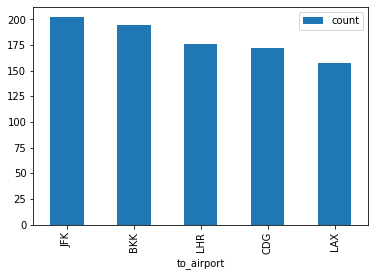

In [0]:
def most_popular_airports(df):
  return df.groupby("to_airport").agg(count=("from_airport", "count")).sort_values(by="count", ascending=False).reset_index().head()
most_popular_airports(df).plot.bar(x="to_airport", y="count")

#### 4.3.2. ***DIY:** Most popular cities

#### 4.3.3 ***DIY:** Most popular countries

### 4.4. Shortest round-trip flight

In [0]:
df["trip_lenght"] = df.return_time - df.depart_time
df[(df.is_round_trip == True) & (df.trip_lenght == df.trip_lenght.min())]



,from_airport,to_airport,to_city,to_country,depart_time,return_time,total_stops,airlines,price,is_round_trip,month,trip_lenght
154,GPT,IAH,Houston,USA,2019-12-09 07:03:00,2019-12-09 16:13:00,0,UA-UA,637,True,12,09:10:00


### 4.5. ***DIY:** Calculate cheapest flight from airport (if you want to escape)

### 4.6. Get average price from airport to country

In [0]:
df.groupby("from_airport").count().sort_values(by="to_airport", ascending = False)
df[df.from_airport == "JFK"].groupby("to_country").agg(avg_price=("price", "mean")).round({"avg_price":2}).sort_values(by="avg_price").reset_index()

,to_country,avg_price
0,Poland,189.00
1,Hellenic Republic,287.00
2,Bermuda,332.00
3,Commonwealth of Puerto Rico,363.67
4,Grenada,379.00
...,...,...
58,Federal Democratic Republic of Nepal,2603.50
59,Kingdom of Saudi Arabia,3172.00
60,Republic of Bulgaria,3478.50
61,Republic of Turkey,3978.00


### 4.7. Get all possible years for select

In [0]:
def get_all_possible_years(df):
  return df.depart_time.dt.year.unique()

get_all_possible_years(df)

array([2020, 2019])

# 5. Search Form

###5.1 Widgets for the search form

In [0]:
year_widget = widgets.Dropdown(
    options = get_all_possible_years(df),
    value=2019,
    description="Year"
)

price_range_widget = widgets.SelectionRangeSlider(
    options = list(range(0, 10050, 50)),
    index = (0, 200),
    description = "Price"

)



###5.2 Methods for the search form

In [0]:
def search_by_route_starts(df, from_airport, to_airport):
  return df[(df.from_airport.str.startswith(from_airport.upper()) )&(df.to_airport.str.startswith(to_airport.upper()))]

def search_by_year(df, year):
  return df[df.depart_time.dt.year == year]

def filter_by_price(df, price_range):
  return df[(df.price >= price_range[0]) & (df.price <= price_range[1])]

def filter_by_round_trip(df, round_trip):
  return df[df.is_round_trip == round_trip]

###5.3 The Search Form

In [0]:
@interact
def search_form(
    origin: "",
    destination: "",
    year = year_widget,
    price_range = price_range_widget,
    round_trip = True
):
  df_local = df.copy()
  df_local = search_by_route_starts(df, origin, destination)
  df_local = search_by_year(df_local, year)
  df_local = filter_by_price(df_local, price_range)
  
  return df_local

interactive(children=(Text(value='', description='origin'), Text(value='', description='destination'), Dropdow…